(48, 721, 1440)
(721,)
(1440,)


ValueError: Axes should be an instance of GeoAxes, got <class 'matplotlib.axes._subplots.AxesSubplot'>

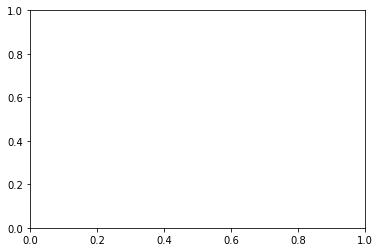

In [2]:
#!/usr/bin/env python
# coding: utf-8
# Import the tools needed :

from netCDF4 import Dataset
import matplotlib.pylab as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np
import matplotlib.pyplot as plt  # plotting library
import numpy as np  # numerical library
import xarray as xr  # netCDF library
import cartopy  # Map projections libary
import cartopy.crs as ccrs  # Projections list
import datetime #date time slicing/indexing
from netCDF4 import Dataset
import wrf
import xarray as xr
import numpy as np
import cartopy.crs as crs
import matplotlib
from matplotlib.cm import get_cmap
import matplotlib.pyplot as plt
import cartopy.feature as cfe
from scipy.ndimage import gaussian_filter
import cartopy.crs as ccrs
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

scheme_name=["(a) ERA 5 Idai","(b) ERA 5 Kenneth","(c) NOCU","(d) K-F","(e) BMJ","(f) GR3D",\
             "(g) NOCU","(h) K-F","(i) BMJ","(j) GR3D"]

###ERA 5

rep_data1='/mnt/g/ERA_5_wspd_slp/wrf_schemes_d01/Era_wrf_data/Era/' #Home
#"G:\ERA_5_wspd_slp\wrf_schemes_d01\Era_wrf_data\Kenneth" Home
#
fic=rep_data1+'eUV10_mslp_01.nc' #u10,v10, mslp
ds=xr.open_dataset(fic)
ds = ds.sel(time=slice('2019-04-25T15:00:00')).load() #,'2019-4-25'))
#many_times=np.array(['2019-03-15T00:00:00','2019-04-25T15:00:00'],dtype=np.datetime64)
#ds =ds.sel(time=many_times, method='nearest').mean('time') #2019-04-25T15:00:00
#ds =ds.sel(time='2019-04-25T15:00:00', method='nearest').mean('time') #2019-04-25T15:00:00


#Read variables
#t2m=ds.variables['t2m'][:].squeeze()
#sp=ds.variables['sp'][:]#.squeeze()
#u10=ds.variables['u10'][:].squeeze()
#v10=ds.variables['v10'][:].squeeze()
#lons=ds.variables['longitude'][:]#.squeeze()
#lats=ds.variables['latitude'][:]#.squeeze()

# Convert 2m temperature from kelvin to Celcius
#t2m = ds.t2m-273.15

lons=ds.longitude
lats=ds.latitude

#ax.set_extent([30.1,55.1,-30.1, 0.1], crs=ccrs.PlateCarree())
sp=ds.sp
u = ds.u10
v = ds.v10  
widths=12


# Convert kilopascal to hPa 
sp = ds.sp/100
sp = gaussian_filter(sp, 3)

print(sp.shape)
print(lats.shape)
print(lons.shape)

# Make the contour outlines for the smoothed sea level pressure.
contours = plt.contour(lons, lats, sp[0], 5,linewidths=1.5, colors="blue",
            transform=crs.PlateCarree())
plt.clabel(contours, inline=1,inline_spacing=0,fontsize=8,fmt='%1.0f',colors='b') #10 fontsize


#transform=ccrs.PlateCarree(), linewidths=5, headaxislength=2, headwidth=3,width=0.01, color='b', scale=1/0.015)
#ax.set_extent([30.1,55.1,-30.1, 0.1], crs=ccrs.PlateCarree())
###########
gl=ax.gridlines(color="black", linestyle="dotted",draw_labels=True)
#plt.colorbar(strm.lines)
ax.add_feature(cartopy.feature.LAND)
ax.add_feature(cartopy.feature.OCEAN)
ax.add_feature(cartopy.feature.BORDERS)
ax.coastlines(color='black');# gl
ax.coastlines(color='black', linewidth=0.8);gl.top_labels = gl.right_labels = False

gl.xlabel_style = {'size': 9}
gl.ylabel_style = {'size': 9}
plt.title(scheme_name[imonth-1],fontsize=10)

rep_data1='/mnt/g/ERA_5_wspd_slp/wrf_schemes_d01/Era_wrf_data/Plots/' 
year='2019'
#plt.tight_layout(pad=4.5, h_pad=1.0, w_pad=1.0)        # To adjust spacing between subplots and inside the figure
plt.savefig(rep_data1+'eramslp_v'+year+'.png', bbox_inches='tight',dpi=200) #''.
plt.savefig(rep_data1+'eramslp_v'+year+'.pdf', bbox_inches='tight',dpi=200)
plt.show() 


In [8]:
def prepare_plot(figsize=(9, 7)):
    """This function returns prepared axes for the polar plot.
    
    Usage:
        fig, ax = prepare_plot()
    """
    fig = plt.figure(figsize=figsize)
    ax = plt.axes(projection=ccrs.SouthPolarStereo())
    ax.set_extent([-180, 180, -90, -60], ccrs.PlateCarree())
    ax.set_boundary(map_circle, transform=ax.transAxes)
    ax.coastlines(); ax.gridlines();
    return fig, ax